In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
rr_df = pd.read_csv('./data/fabio_rr_results.csv')
rr_sizes = set(rr_df['size'].values)
rr_sizes

{10, 20, 40, 80, 100}

In [3]:
rr_imp_df = pd.read_csv('./data/fabio_rr_imp_results.csv')
rr_imp_sizes = set(rr_imp_df['size'].values)
rr_imp_sizes

{10, 20, 40, 80, 100}

In [4]:
rr_imp_df.tail()

,graph_type,size,probabilities,objective_value,time_ms,iterations,branch_and_bound_nodes
583,gnp_random_graph,40,0.8,4.0,158,0,0
584,gnp_random_graph,80,0.5,6.0,8630,0,0
585,gnp_random_graph,80,0.8,4.0,411,0,0
586,gnp_random_graph,100,0.5,7.0,64246,0,0
587,gnp_random_graph,100,0.8,4.0,821,0,0


In [ ]:
def time_hist_by_type():
    for rr_size in rr_sizes:
        # if rr_size not in rr_imp_sizes:
        #     raise
      if rr_size in rr_imp_sizes:


SyntaxError: incomplete input (<ipython-input-7-a34f740c6904>, line 5)

In [5]:
#concatenate full name
rr_imp_df['name'] = rr_imp_df['graph_type'].astype(str).str.cat(rr_imp_df[['size', 'probabilities']].astype(str), sep='_')

print(rr_imp_df)


           graph_type  size  probabilities  objective_value  time_ms  \
0    gnp_random_graph    10            0.5              4.0        8   
1    gnp_random_graph    10            0.8              2.0        6   
2    gnp_random_graph    20            0.5              5.0       15   
3    gnp_random_graph    20            0.8              3.0       15   
4    gnp_random_graph    40            0.5              6.0      221   
..                ...   ...            ...              ...      ...   
583  gnp_random_graph    40            0.8              4.0      158   
584  gnp_random_graph    80            0.5              6.0     8630   
585  gnp_random_graph    80            0.8              4.0      411   
586  gnp_random_graph   100            0.5              7.0    64246   
587  gnp_random_graph   100            0.8              4.0      821   

     iterations  branch_and_bound_nodes                      name  
0             0                       0   gnp_random_graph_10_0.5  

In [6]:
#concatenate full name
rr_df['name'] = rr_df['graph_type'].astype(str).str.cat(rr_df[['size', 'probabilities']].astype(str), sep='_')

print(rr_df)

           graph_type  size  probabilities  objective_value  time_ms  \
0    gnp_random_graph    10            0.5              5.0        7   
1    gnp_random_graph    10            0.8              2.0       10   
2    gnp_random_graph    20            0.5              4.0       17   
3    gnp_random_graph    20            0.8              3.0       16   
4    gnp_random_graph    40            0.5              6.0       64   
..                ...   ...            ...              ...      ...   
591  gnp_random_graph    40            0.8              4.0       38   
592  gnp_random_graph    80            0.5              6.0     3364   
593  gnp_random_graph    80            0.8              4.0      180   
594  gnp_random_graph   100            0.5              7.0    19802   
595  gnp_random_graph   100            0.8              4.0      611   

     iterations  branch_and_bound_nodes                      name  
0             0                       0   gnp_random_graph_10_0.5  

In [ ]:
types = list(rr_imp_df['name'].unique())
types

['gnp_random_graph_10_0.5',
 'gnp_random_graph_10_0.8',
 'gnp_random_graph_20_0.5',
 'gnp_random_graph_20_0.8',
 'gnp_random_graph_40_0.5',
 'gnp_random_graph_40_0.8',
 'gnp_random_graph_80_0.5',
 'gnp_random_graph_80_0.8',
 'gnp_random_graph_100_0.5',
 'gnp_random_graph_100_0.8']

In [7]:
types2 = list(rr_df['name'].unique())
types2

['gnp_random_graph_10_0.5',
 'gnp_random_graph_10_0.8',
 'gnp_random_graph_20_0.5',
 'gnp_random_graph_20_0.8',
 'gnp_random_graph_40_0.5',
 'gnp_random_graph_40_0.8',
 'gnp_random_graph_80_0.5',
 'gnp_random_graph_80_0.8',
 'gnp_random_graph_100_0.5',
 'gnp_random_graph_100_0.8']

## Plotando gráficos de tempo gasto em cada tipo de grafo que foi testado

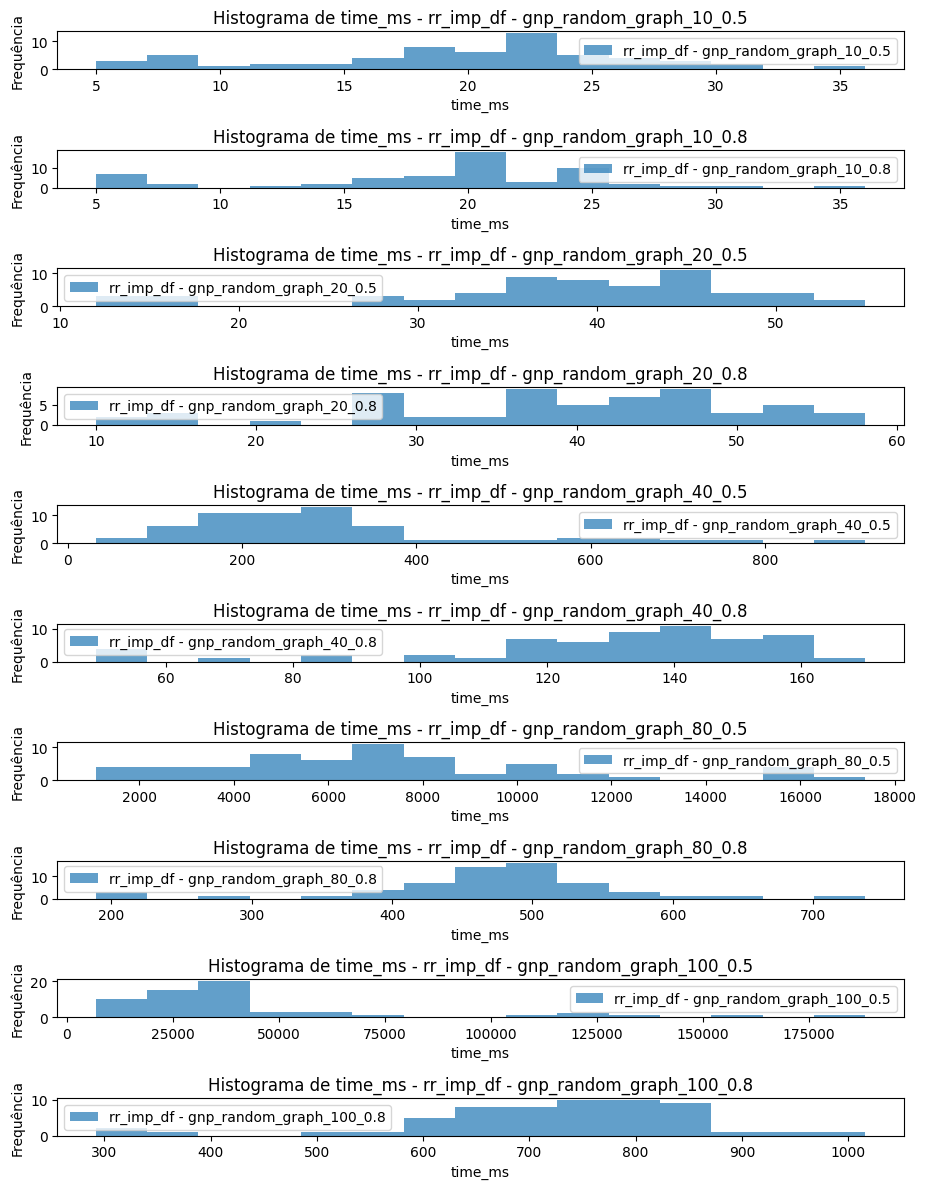

In [9]:
types = rr_imp_df['name'].unique()

plt.figure(figsize=(18, 12))

for i, t in enumerate(types):
    df_imp_filtered = rr_imp_df[rr_imp_df['name'] == t]
    df_filtered = rr_imp_df[rr_imp_df['name'] == t]

    # Plotar histograma para rr_imp_df
    plt.subplot(len(types), 2, 2 * i + 1)
    plt.hist(df_imp_filtered['time_ms'], bins=15, alpha=0.7, label=f'rr_imp_df - {t}')
    plt.title(f'Histograma de time_ms - rr_imp_df - {t}')
    plt.xlabel('time_ms')
    plt.ylabel('Frequência')
    plt.legend()



plt.tight_layout()

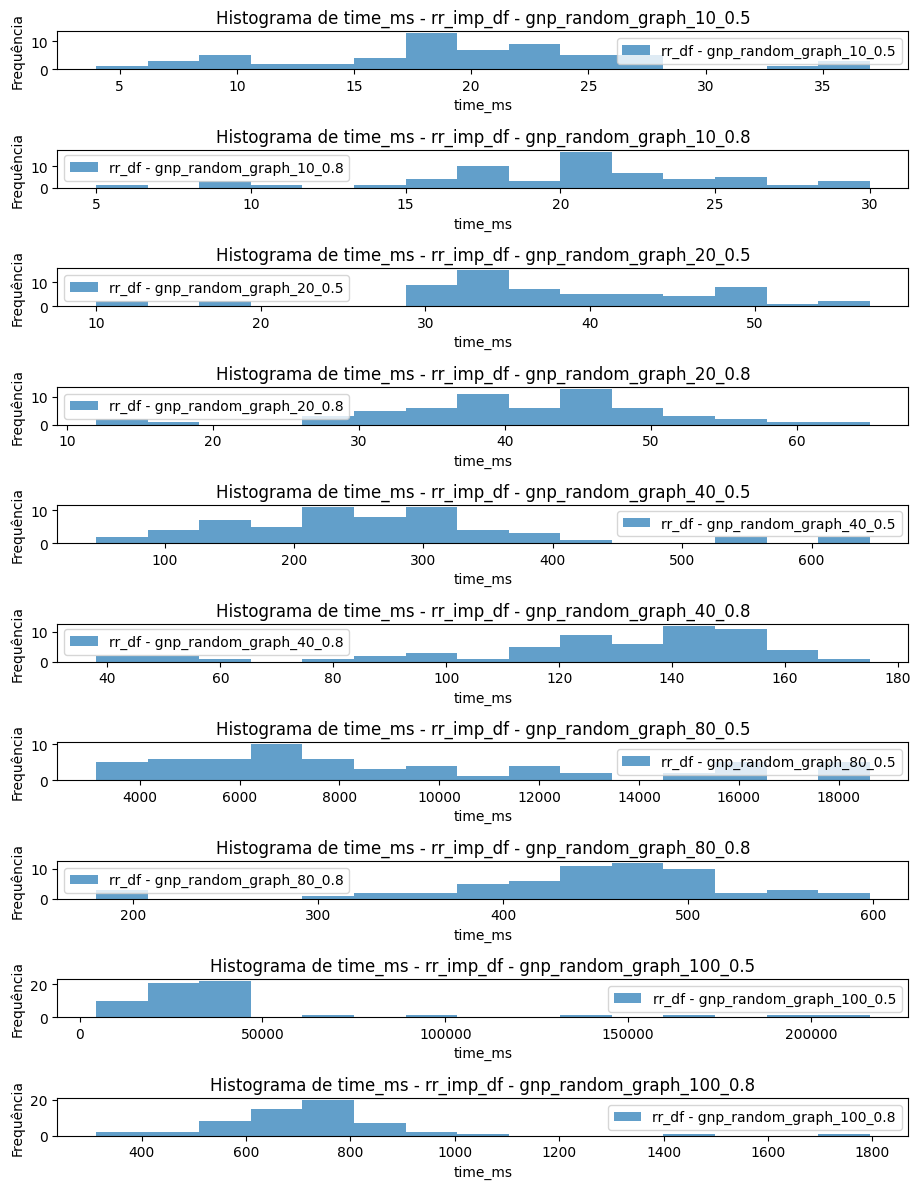

In [10]:
# Lista dos tipos únicos
types2 = rr_df['name'].unique()

plt.figure(figsize=(18, 12))

for i, t in enumerate(types):

    df_filtered = rr_df[rr_df['name'] == t]
    df_filtered = rr_df[rr_df['name'] == t]

    # Plotar histograma para rr_imp_df
    plt.subplot(len(types), 2, 2 * i + 1)
    plt.hist(df_filtered['time_ms'], bins=15, alpha=0.7, label=f'rr_df - {t}')
    plt.title(f'Histograma de time_ms - rr_imp_df - {t}')
    plt.xlabel('time_ms')
    plt.ylabel('Frequência')
    plt.legend()



plt.tight_layout()